In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)

In [3]:
male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
male_df = male_df[keep_syllables]

In [4]:
female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
female_df = female_df[keep_syllables]

In [5]:
avg_male = male_df.groupby('age').mean()

In [6]:
avg_male = avg_male - avg_male.min()
avg_male = avg_male / avg_male.max()

In [7]:
norm_syll_sort = (
    avg_male.rolling(5, center=True, win_type="exponential")
    .mean(tau=1.5)
    .idxmax()
    .sort_values()
    .index
)


In [8]:
avg_female = female_df.groupby('age').mean()

In [9]:
avg_female = avg_female - avg_female.min()
avg_female = avg_female / avg_female.max()

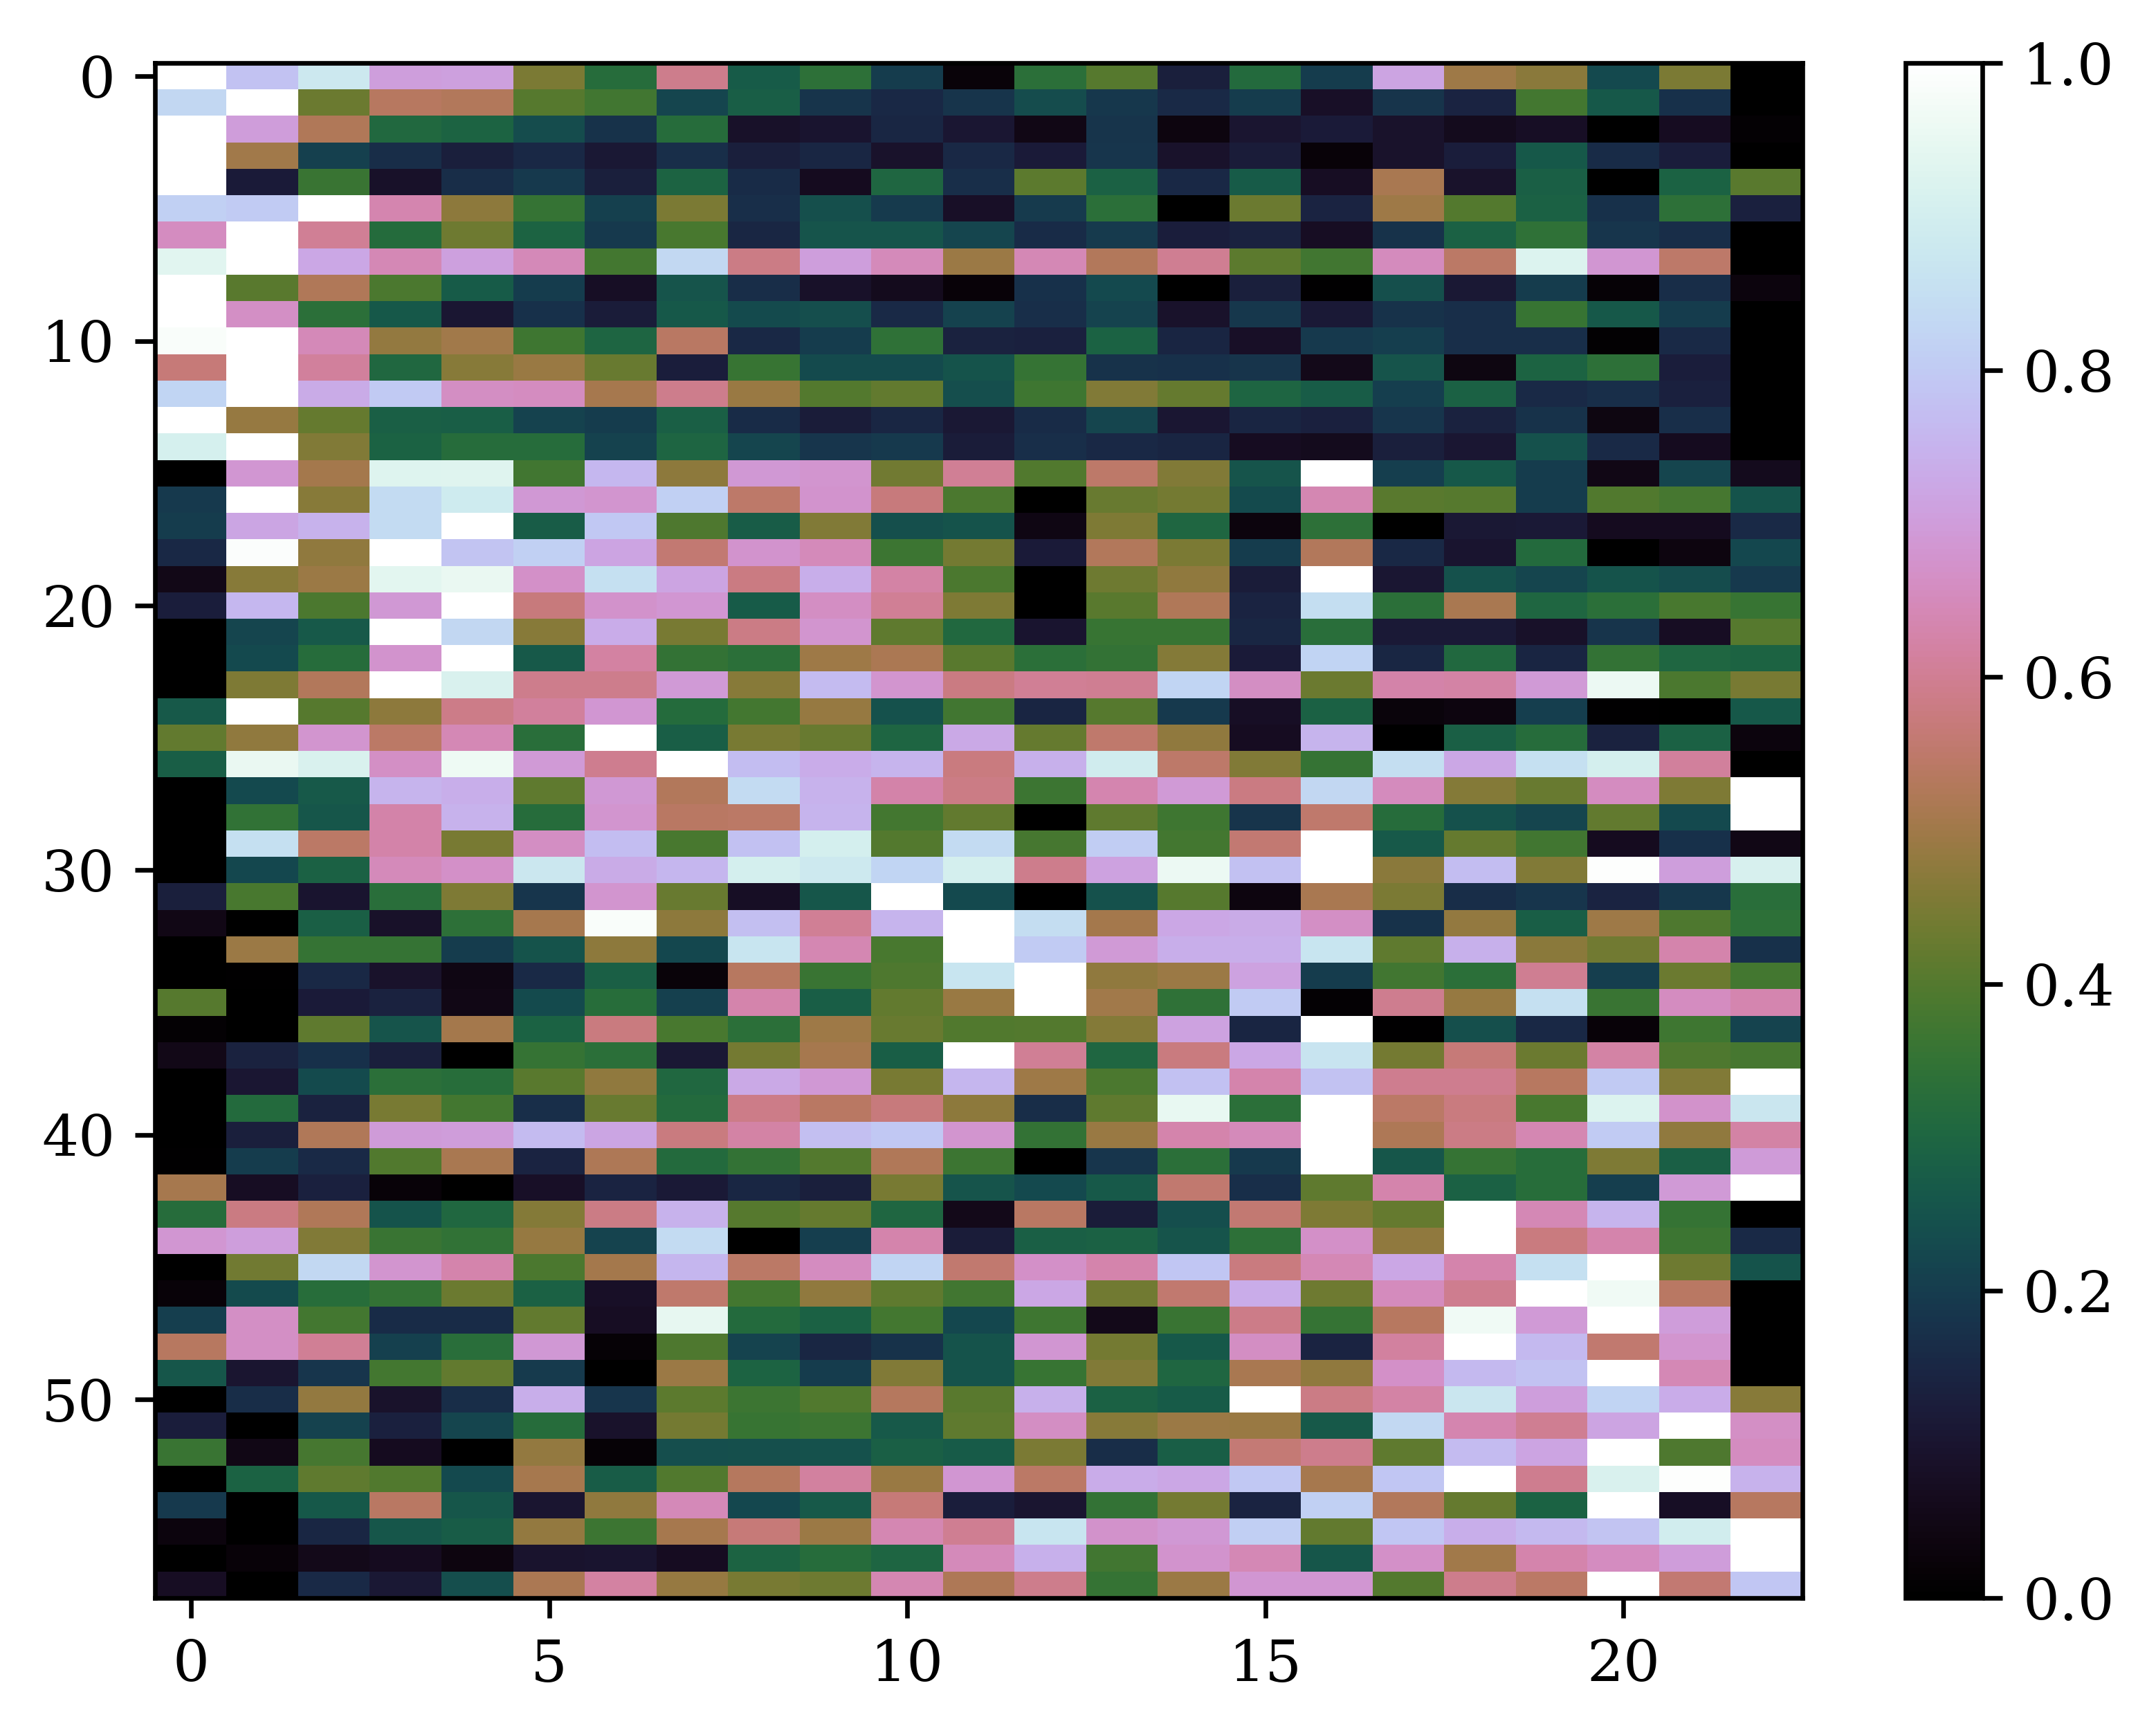

In [10]:
plt.imshow(avg_male[norm_syll_sort].T, aspect='auto', interpolation='none', cmap='cubehelix')
plt.colorbar()

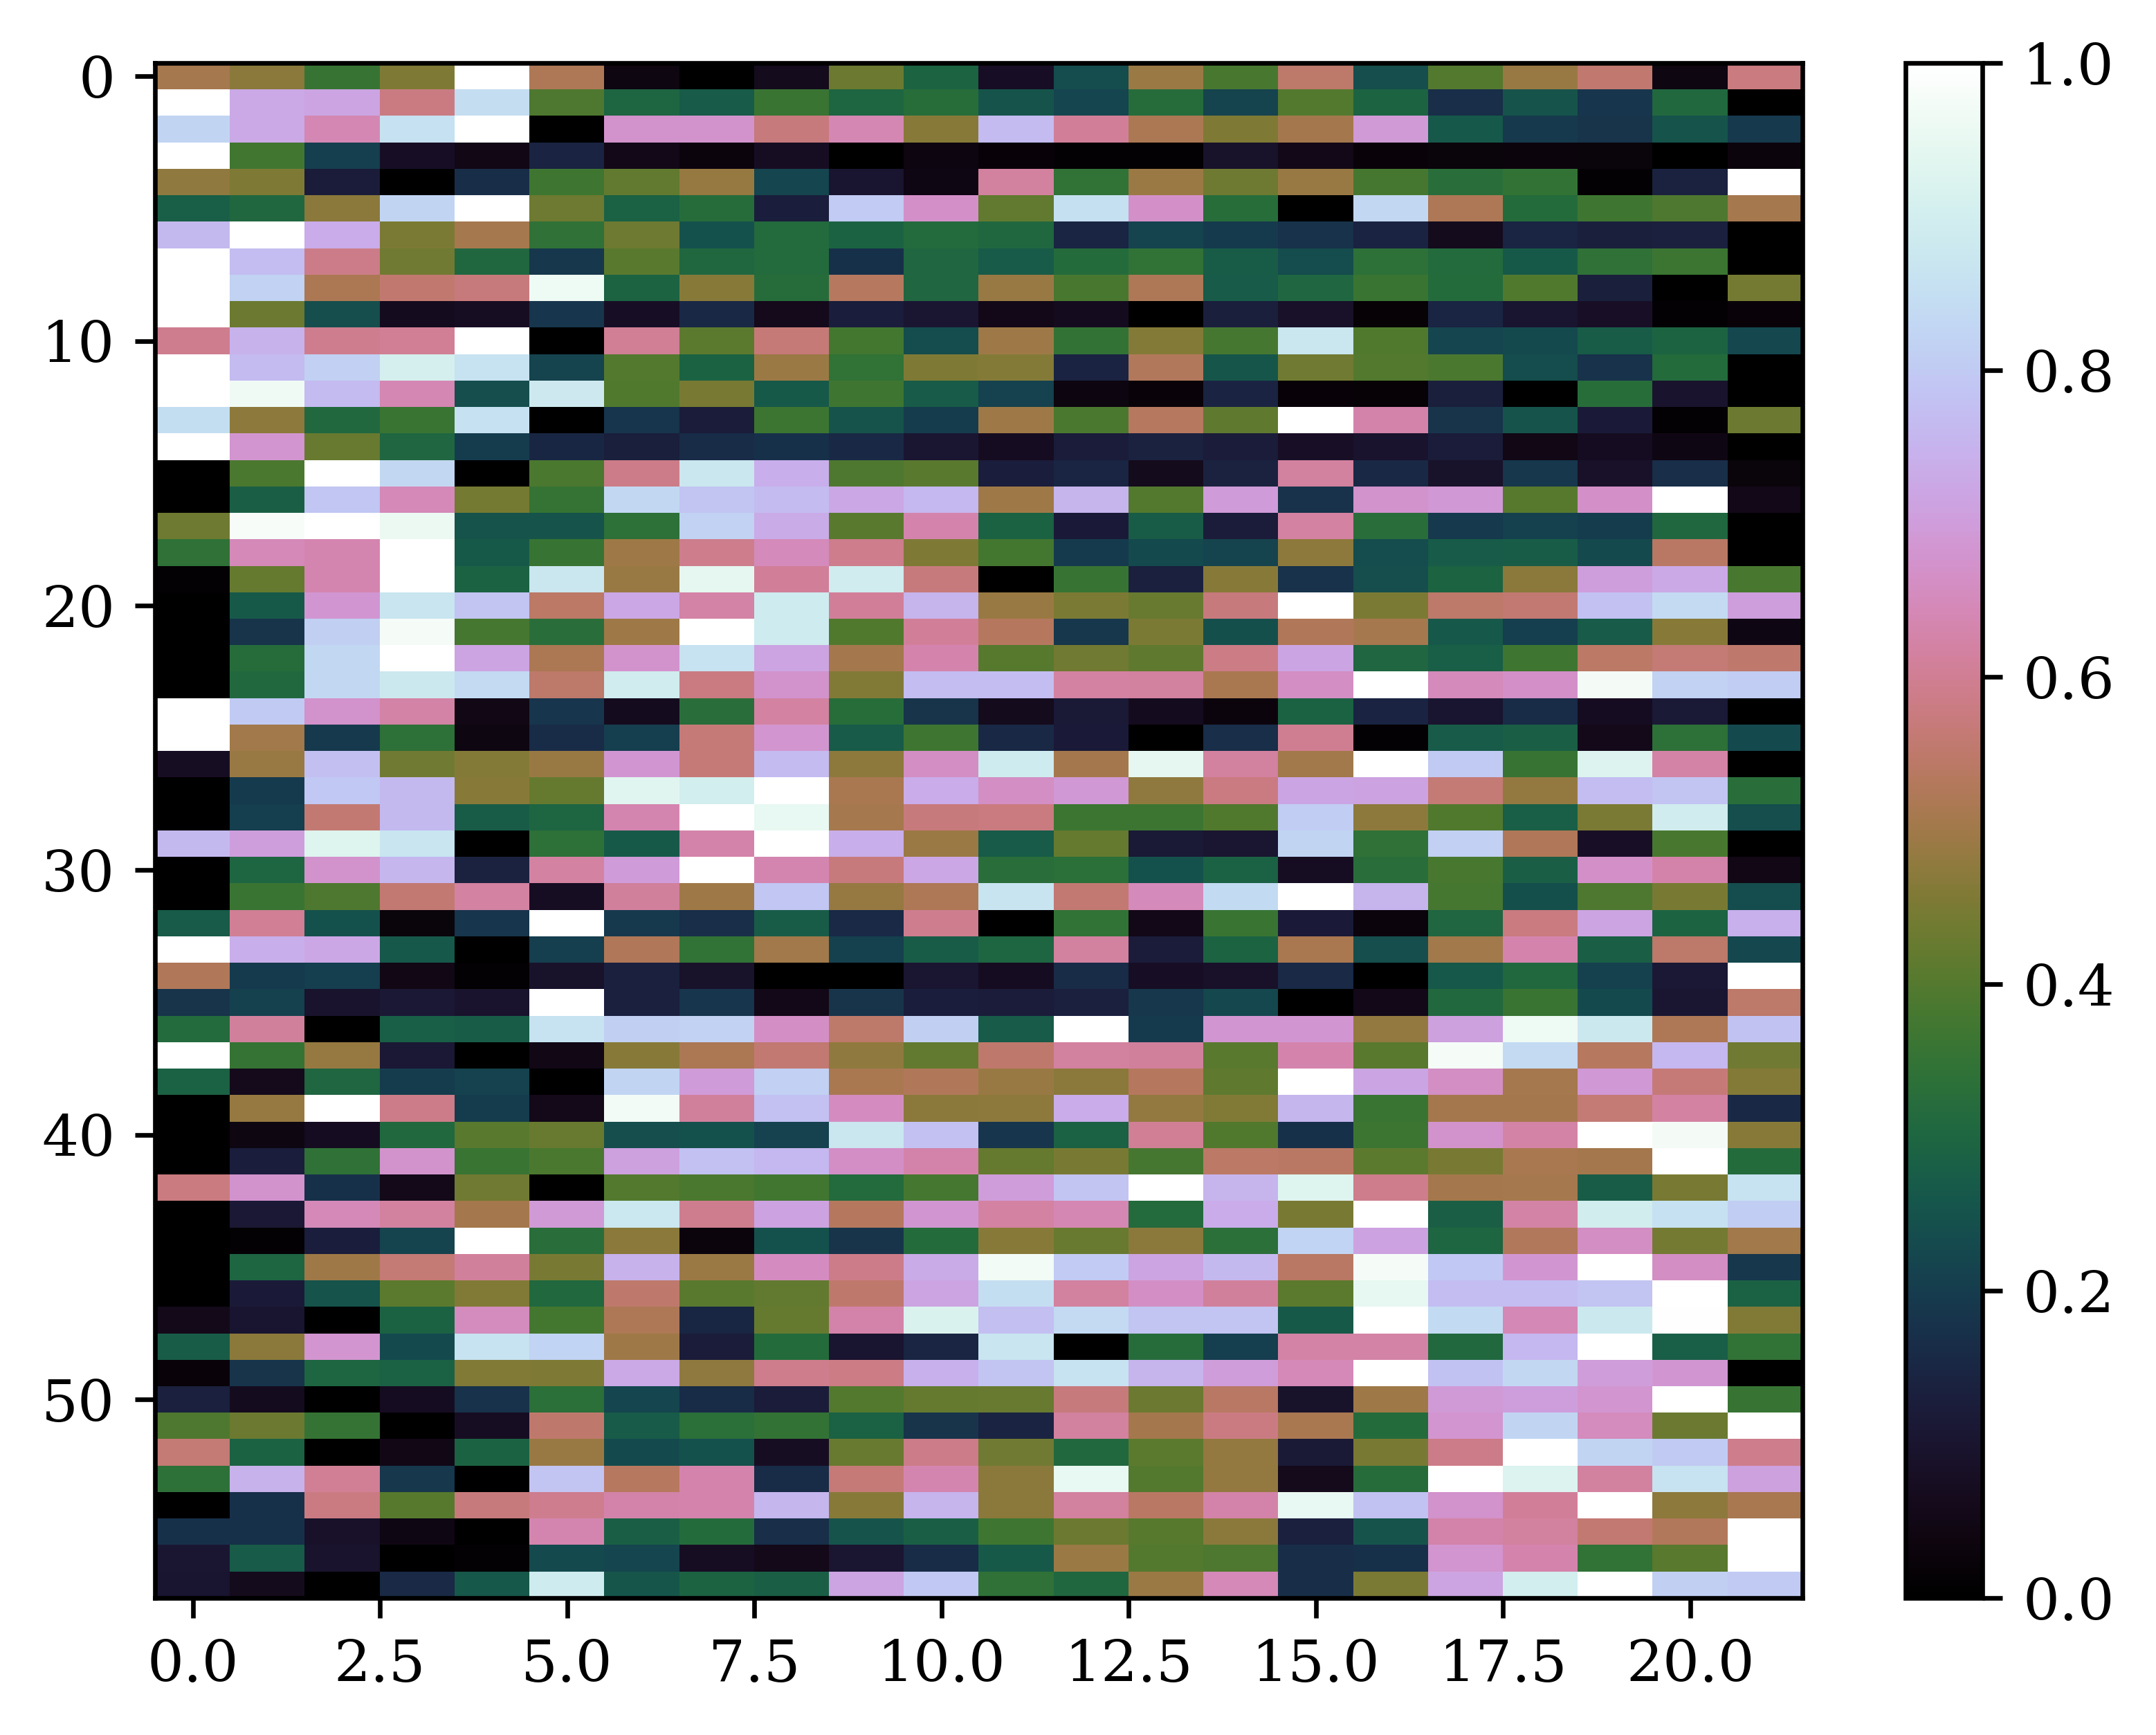

In [11]:
plt.imshow(avg_female[norm_syll_sort].T, aspect='auto', interpolation='none', cmap='cubehelix')
plt.colorbar()

## Dana ontogeny females

In [12]:
female_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/dana_ontogeny_females_raw_usage_matrix_v00.parquet').astype(float)
female_df = female_df[keep_syllables]

In [13]:
avg_female = female_df.groupby('age').mean()

In [14]:
avg_female = avg_female - avg_female.min()
avg_female = avg_female / avg_female.max()

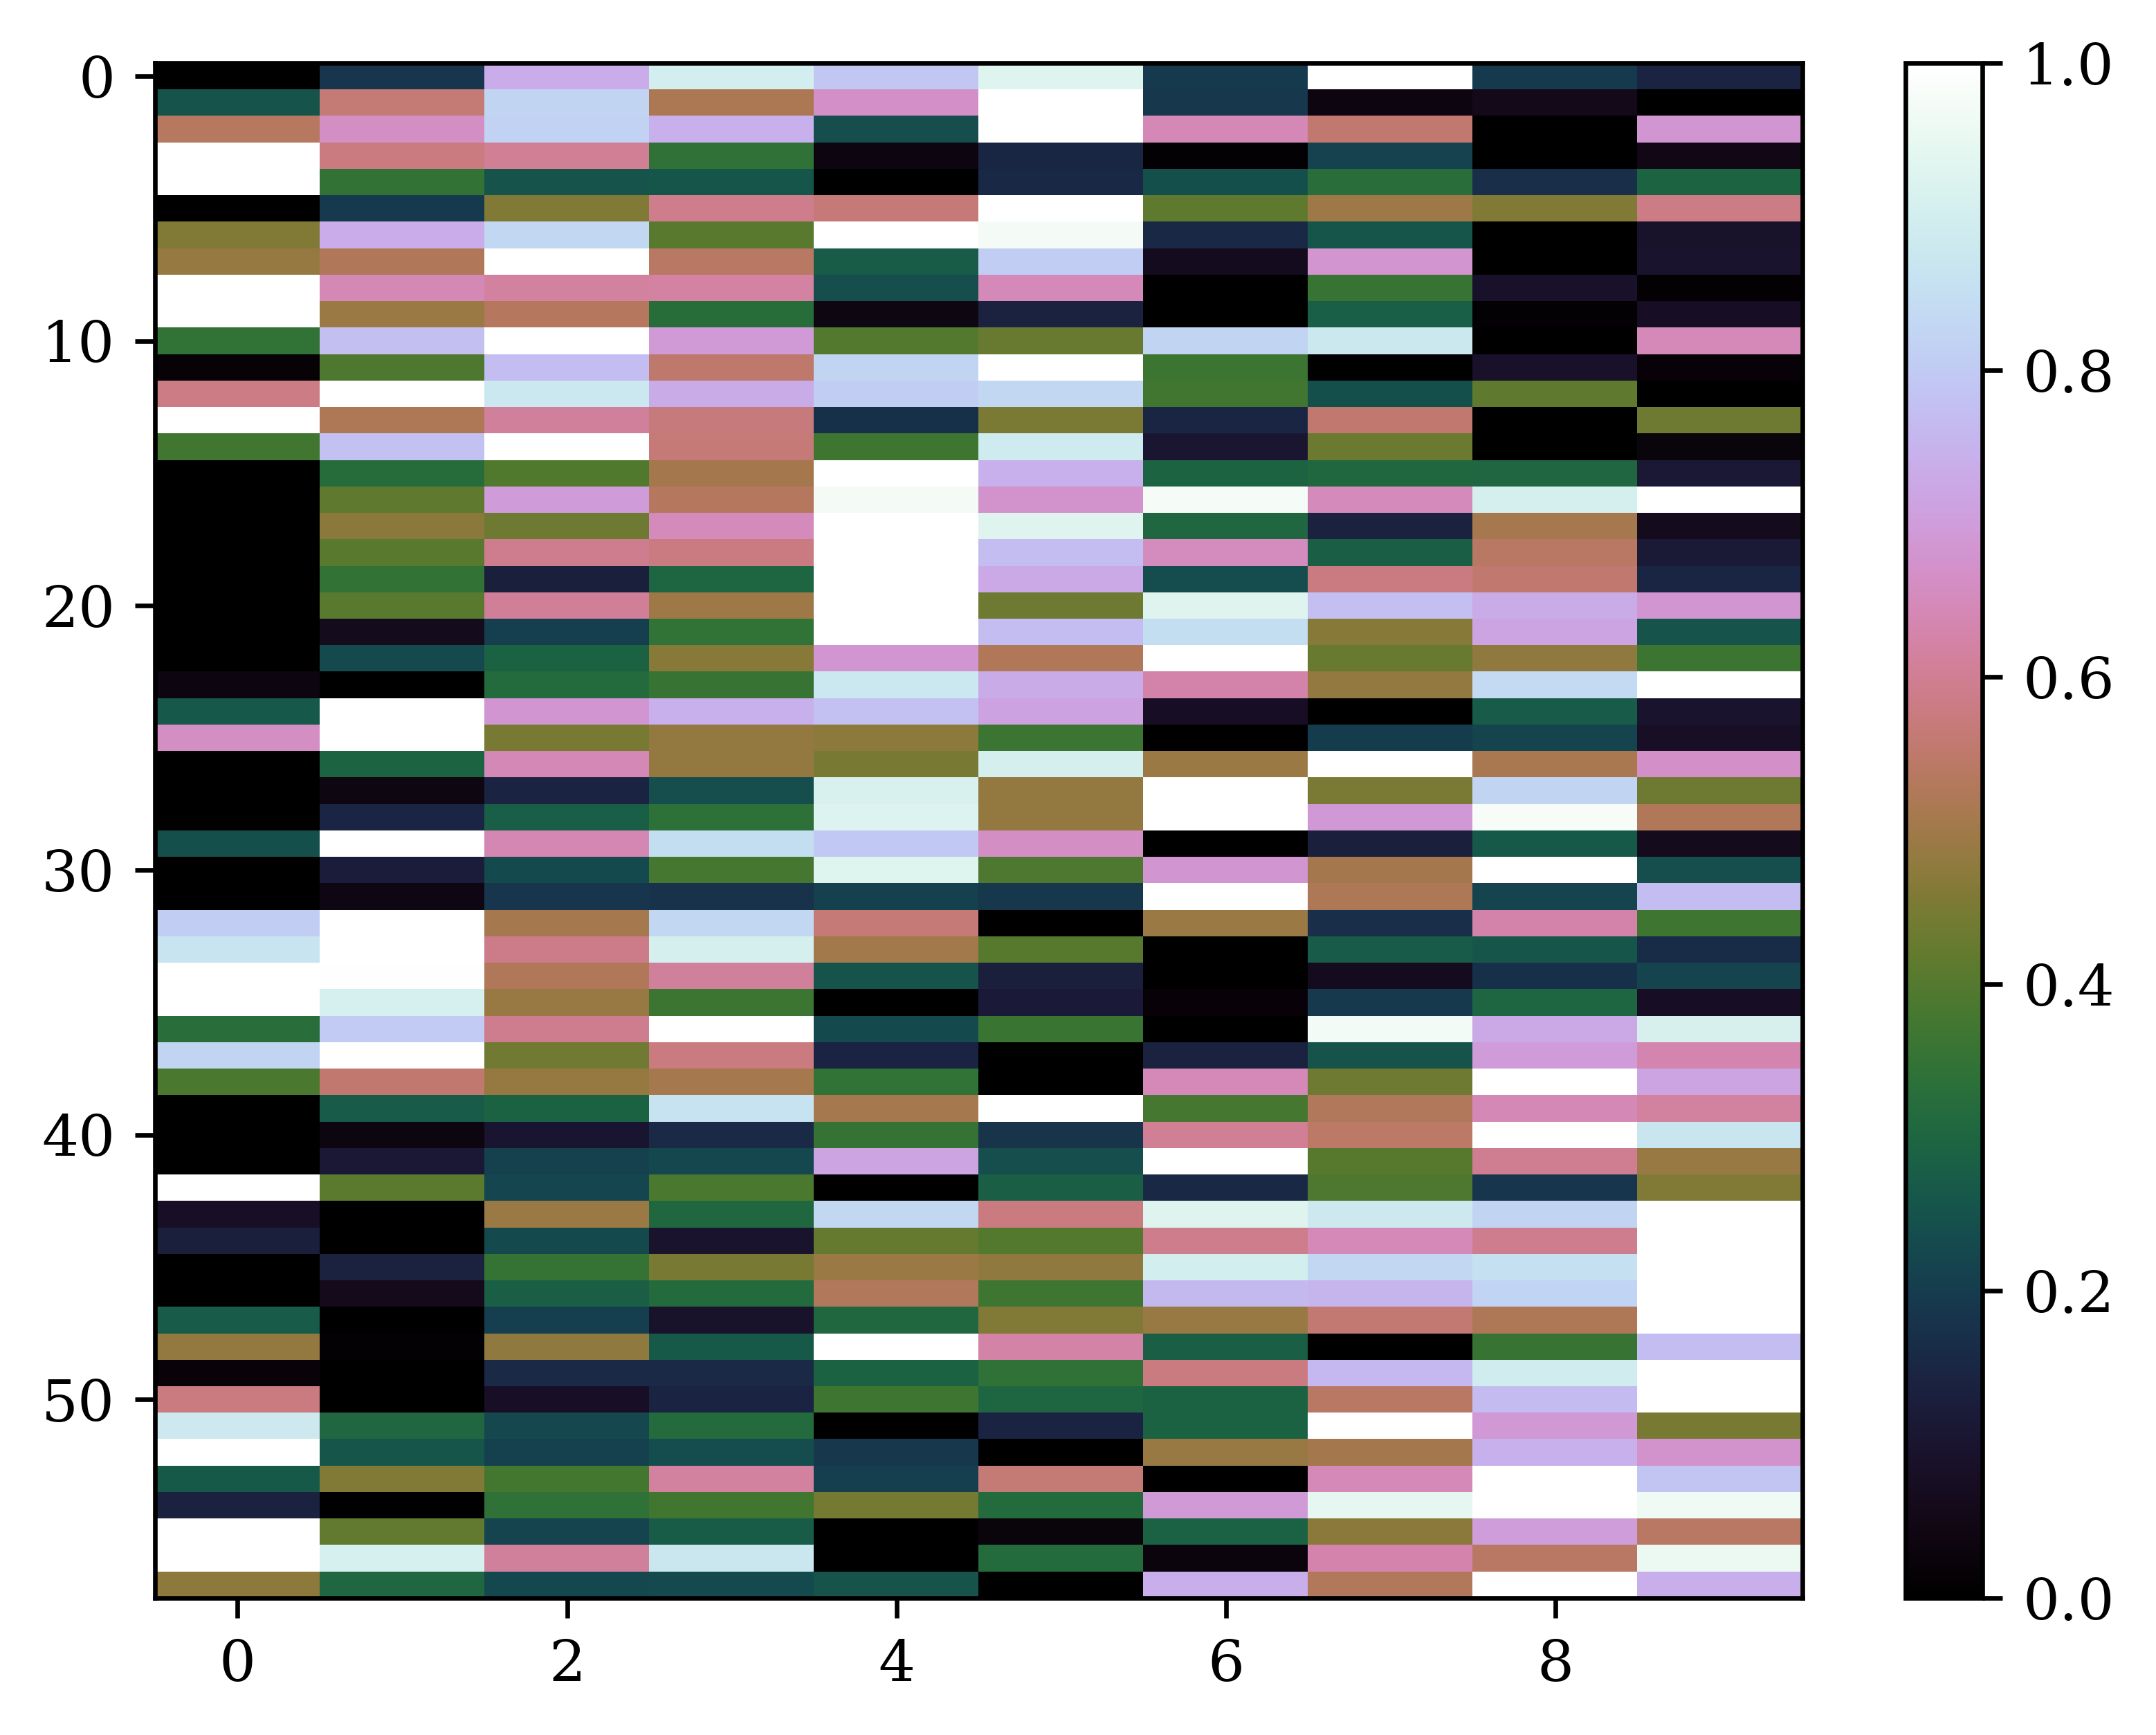

In [15]:
plt.imshow(avg_female[norm_syll_sort].T, aspect='auto', interpolation='none', cmap='cubehelix')
plt.colorbar()

## Dana ontogeny males

In [16]:
male_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/dana_ontogeny_males_raw_usage_matrix_v00.parquet').astype(float)
male_df = male_df[keep_syllables]

In [17]:
avg_male = male_df.groupby('age').mean()

In [18]:
avg_male = avg_male - avg_male.min()
avg_male = avg_male / avg_male.max()

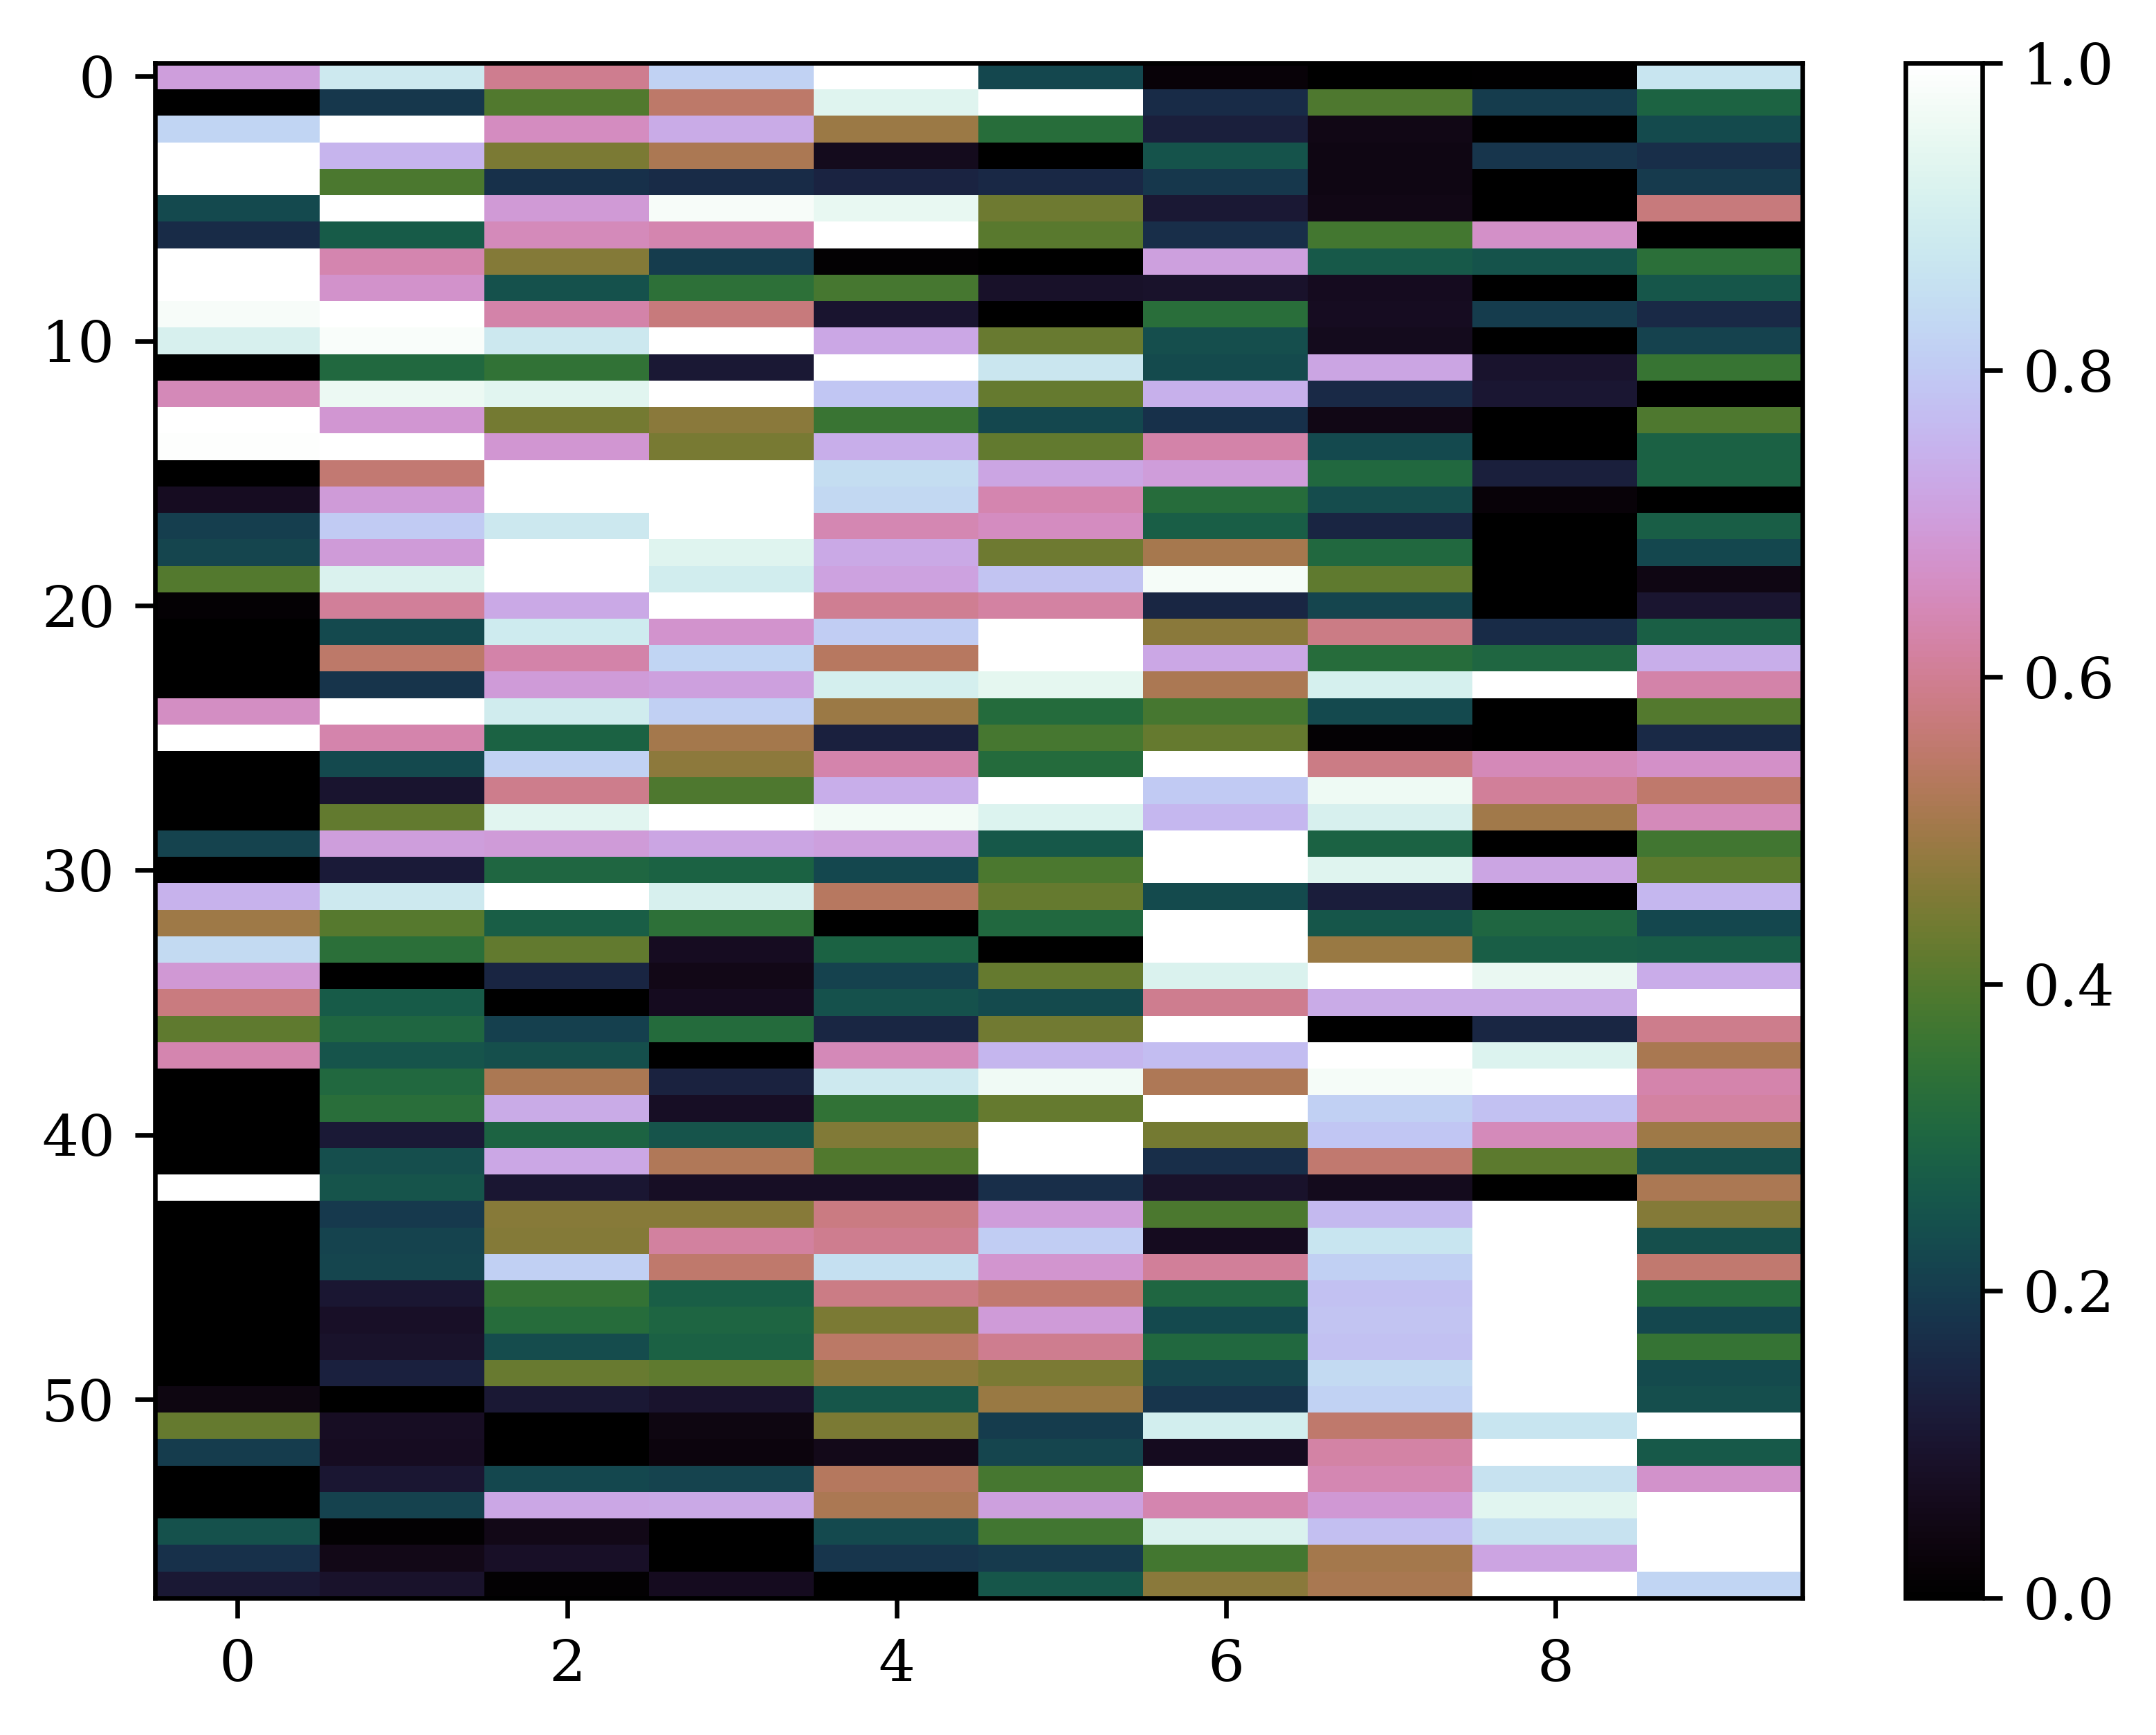

In [20]:
plt.imshow(avg_male[norm_syll_sort].T, aspect='auto', interpolation='none', cmap='cubehelix')
plt.colorbar()

## Male female longtogeny

In [21]:
female_long = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_v2_females_raw_usage_matrix_v00.parquet')
female_long = female_long[keep_syllables]

male_long = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_v2_males_raw_usage_matrix_v00.parquet')
male_long = male_long[keep_syllables]

In [31]:
bin_age = female_long.index.get_level_values('age') * 7 // 7
avg_usage = female_long.groupby(bin_age, observed=True).mean()

avg_usage = avg_usage - avg_usage.min()
avg_usage = avg_usage / avg_usage.max()

Text(0.5, 1.0, 'female')

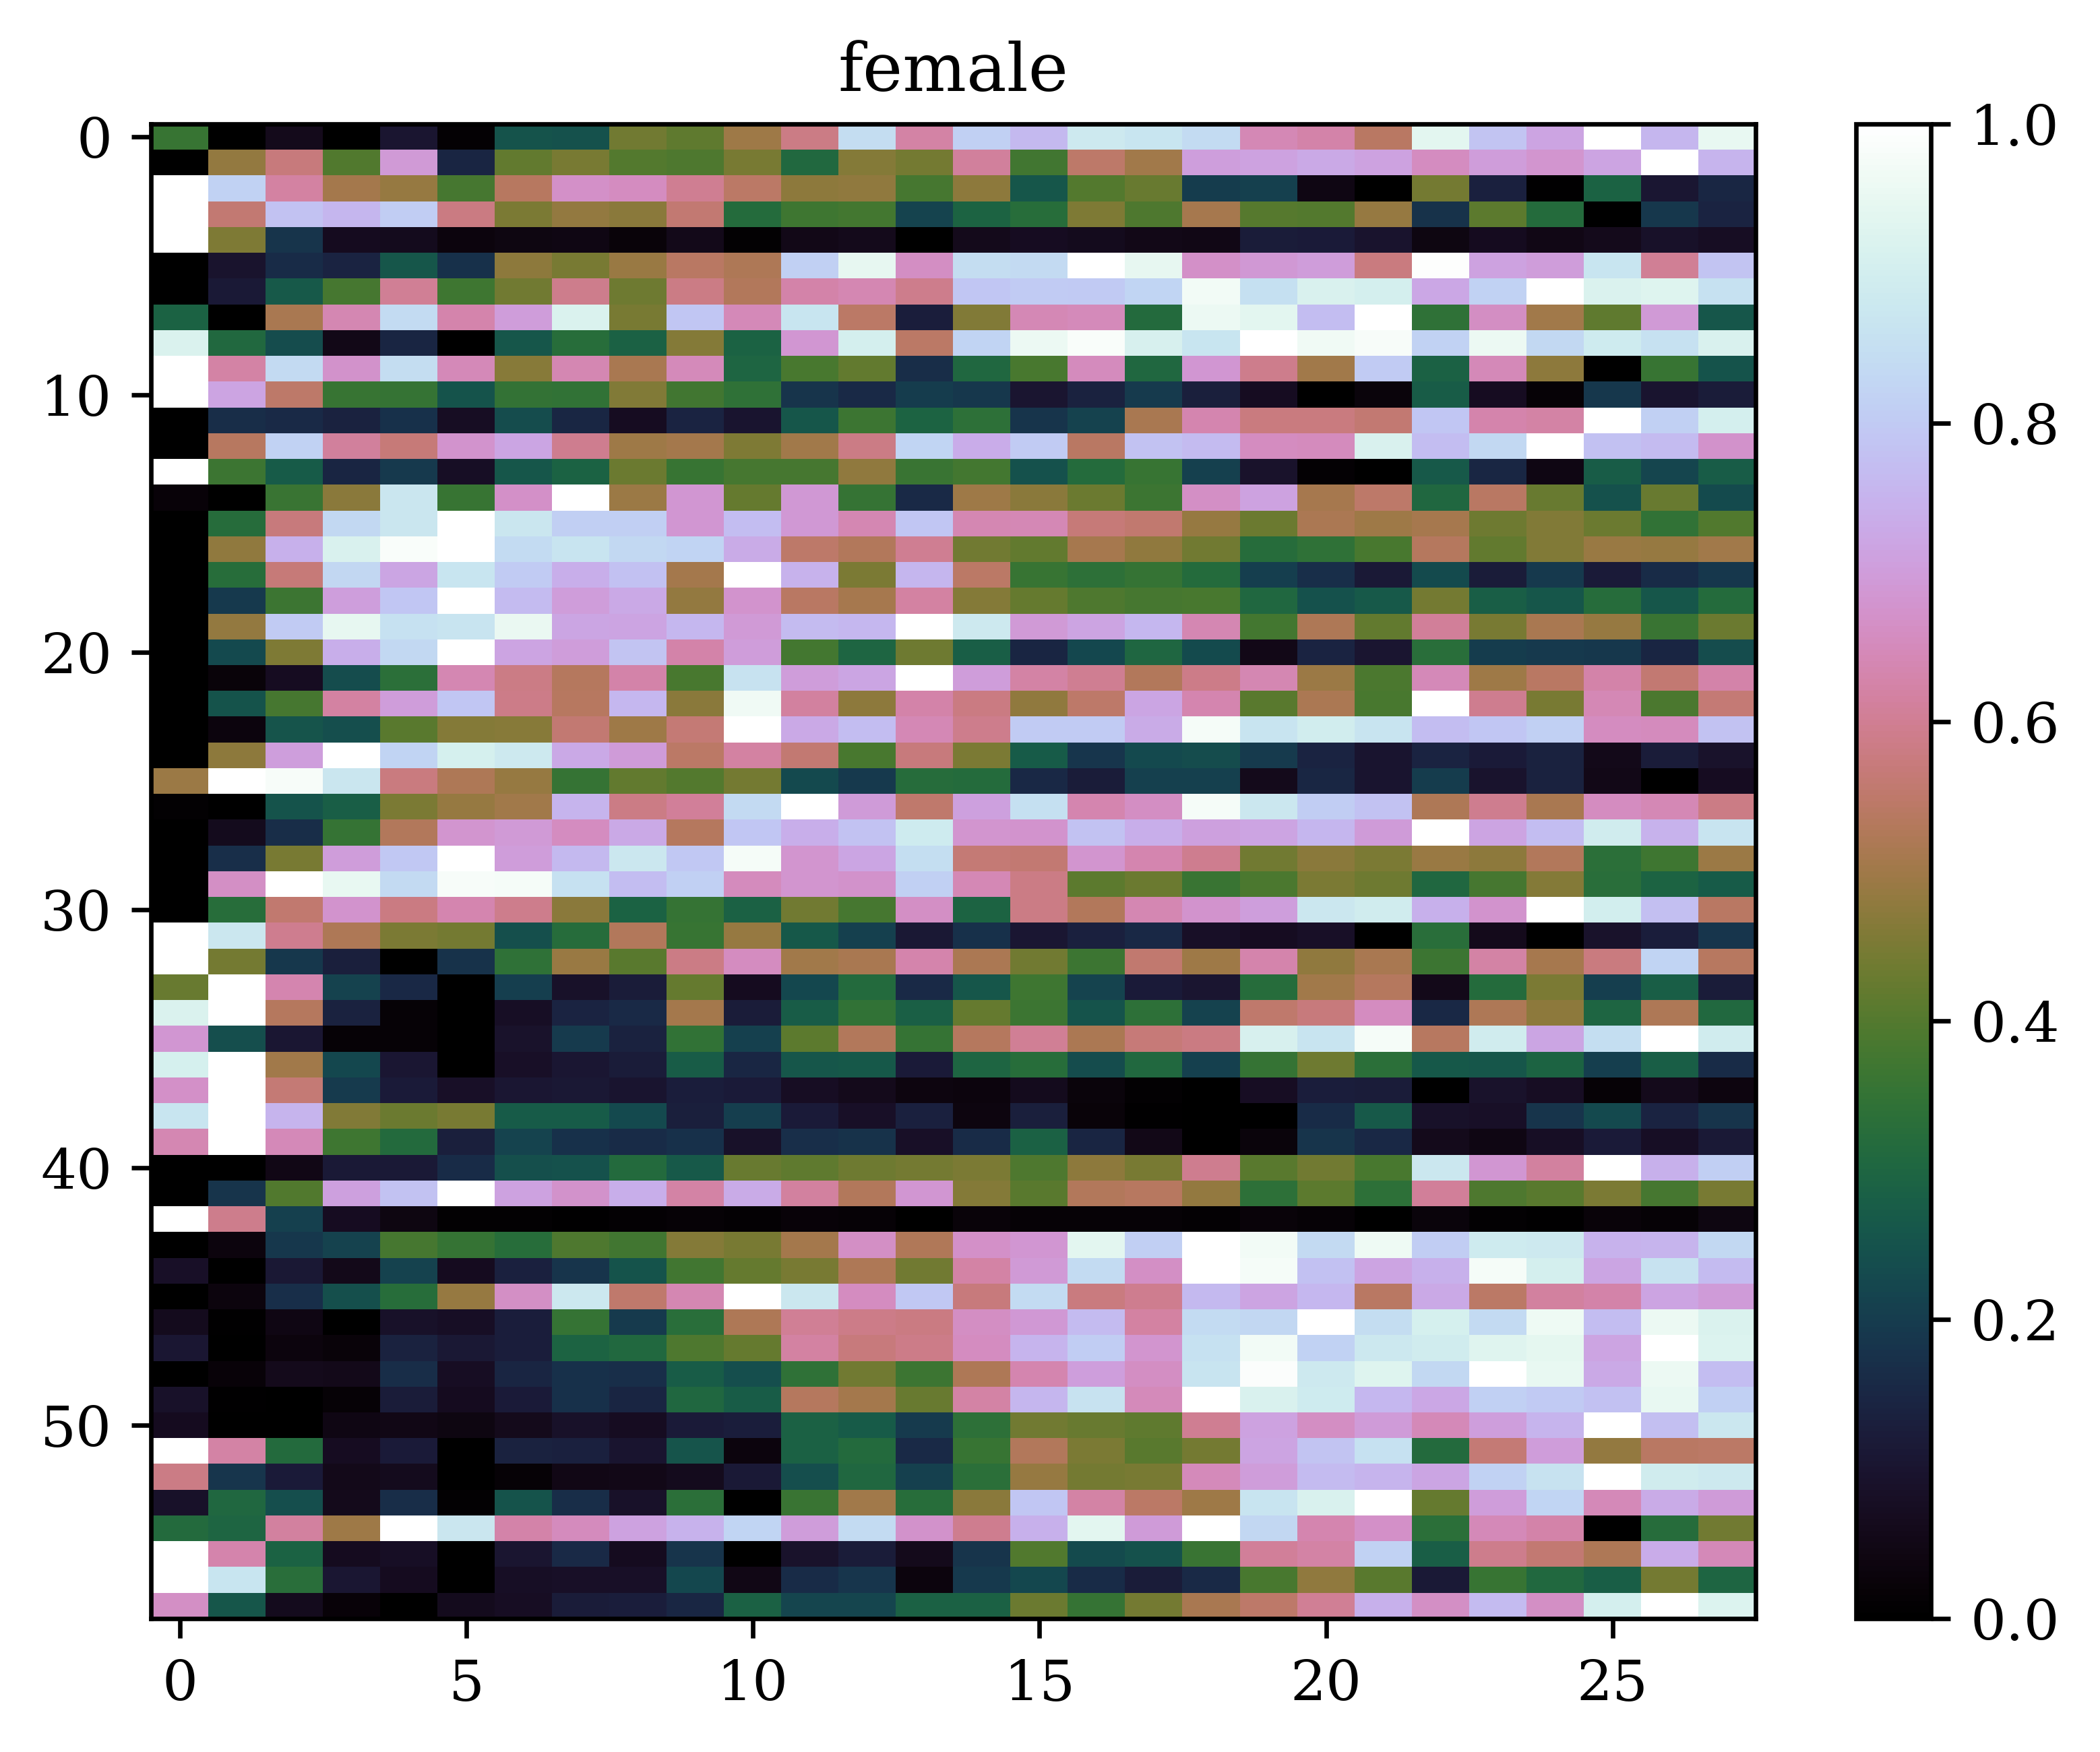

In [32]:
# female
plt.imshow(avg_usage[norm_syll_sort].T, aspect='auto', interpolation='none', cmap='cubehelix')
plt.colorbar()
plt.title('female')

In [29]:
bin_age = male_long.index.get_level_values('age') * 7 // 7
avg_usage = male_long.groupby(bin_age, observed=True).mean()

avg_usage = avg_usage - avg_usage.min()
avg_usage = avg_usage / avg_usage.max()

Text(0.5, 1.0, 'male')

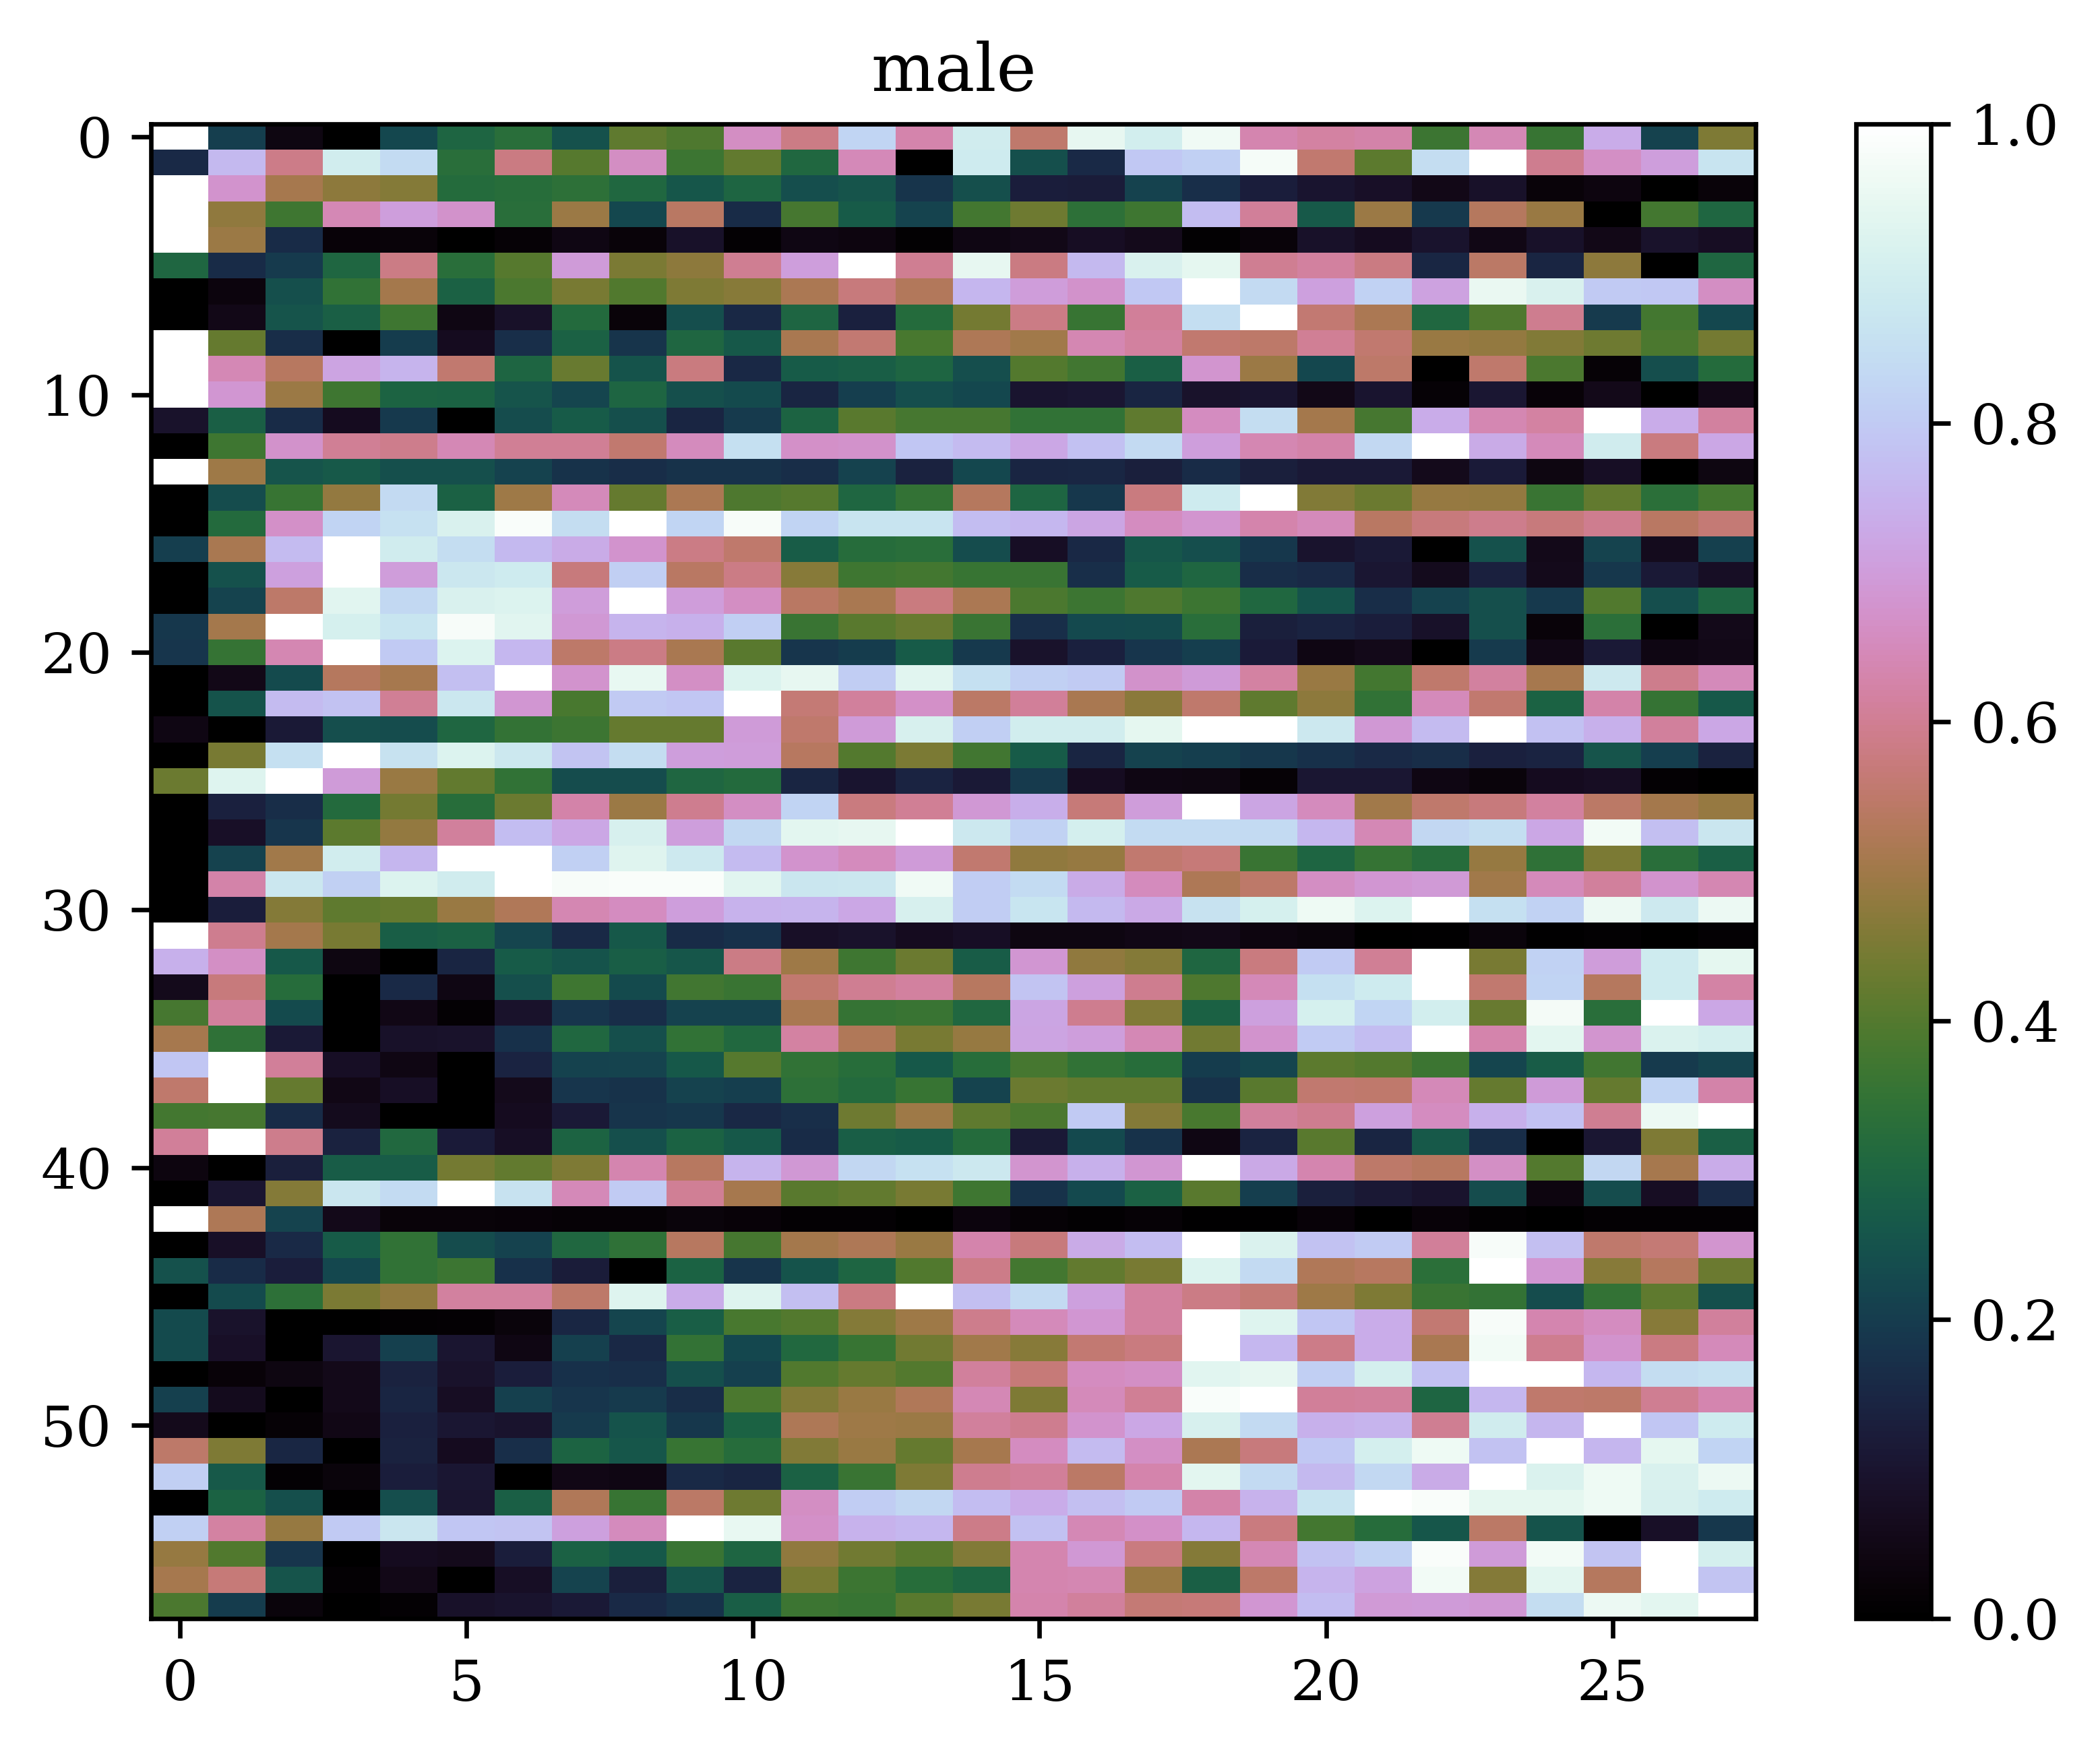

In [30]:
# male
plt.imshow(avg_usage[norm_syll_sort].T, aspect='auto', interpolation='none', cmap='cubehelix')
plt.colorbar()
plt.title('male')